In [391]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# show all columns in dataframe
pd.set_option('display.max_columns', None)


In [392]:
import sys
sys.path.append('/Users/pratikp/Code/python/my-data-science')
from  utils import pandas as pdx
from  utils import plotly as mpx
from  utils import seaborn as msns

In [393]:
data = pd.read_csv('./data/train.csv')
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [394]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [395]:
data.shape

(1460, 81)

## Data Cleaning and Preparation

In [396]:
data.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

- Removing columns > 90 percent `NA` values. Even though they are not actually null from the description.
- Considering any column with more than 90 percent similar values as a `zero variance feature` and ignoring it.

In [397]:
data = pdx.filter_cols_with_null_values(data, 0.9)

Removing columns with null values above 90.0%: Index(['Alley', 'PoolQC', 'MiscFeature'], dtype='object')
Null values in columns in the final df: 
 Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64


`NA` to `None` converstion for other columns which are acutally not null.

In [398]:
columns_to_transform = ['Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']

for col in columns_to_transform:
    data[col] = data[col].fillna('None')

In [399]:
data.isnull().sum().sort_values(ascending=False).head(25)

LotFrontage      259
GarageType        81
GarageYrBlt       81
MasVnrType         8
MasVnrArea         8
Electrical         1
KitchenQual        0
FireplaceQu        0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
Id                 0
KitchenAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
BedroomAbvGr       0
GarageFinish       0
GarageCars         0
GarageArea         0
SaleCondition      0
dtype: int64

In [400]:
col_name = 'LotFrontage'
data[data[col_name].isnull()][col_name]

7      NaN
12     NaN
14     NaN
16     NaN
24     NaN
        ..
1429   NaN
1431   NaN
1441   NaN
1443   NaN
1446   NaN
Name: LotFrontage, Length: 259, dtype: float64

Better to drop `LotFrontage` since it has many null values

In [401]:
data.drop('LotFrontage', axis=1, inplace=True)

Checking each rows for null values and removing rows with more than 5 null values. 

In [402]:
data.isnull().sum(axis=1).sort_values(ascending=False).head(25)
# drop if more than 5-10 null values in a row

528     2
78      2
976     2
614     2
163     2
613     2
89      2
88      2
165     2
973     2
464     2
826     2
520     2
970     2
620     2
1030    2
968     2
1143    2
1137    2
1218    2
1038    2
1219    2
529     2
1131    2
533     2
dtype: int64

## Imputing "Real" NaN Values

These are the real NaN values that we have to deal with accordingly because they were not recorded.

In [403]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
most_frequent_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [404]:
data.isnull().sum().sort_values(ascending=False).head(25)

GarageYrBlt      81
GarageType       81
MasVnrType        8
MasVnrArea        8
Electrical        1
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
Id                0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
KitchenAbvGr      0
GarageFinish      0
GarageCars        0
GarageArea        0
SaleCondition     0
SaleType          0
dtype: int64

In [405]:
data['GarageYrBlt'] = median_imputer.fit_transform(data[['GarageYrBlt']])
data['GarageType'] = most_frequent_imputer.fit_transform(data[['GarageYrBlt']])
data['MasVnrType'] = most_frequent_imputer.fit_transform(data[['MasVnrType']])
data['MasVnrArea'] = median_imputer.fit_transform(data[['MasVnrArea']])
data['Electrical'] = most_frequent_imputer.fit_transform(data[['Electrical']])

In [406]:
data.isnull().sum().sort_values(ascending=False)

Id              0
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
               ..
ExterQual       0
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
SalePrice       0
Length: 77, dtype: int64

In [407]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Univariate EDA

In [408]:
# sweetwiz 
# zero variance feature
import plotly.express as px

In [409]:
cols_to_plot = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# Got from the correlation matrix below

In [410]:
px.histogram(data, x='SalePrice',color="OverallQual", marginal="box", labels={'SalePrice':'SalePrice'}, height=700)

## Univariate Analysis

In [411]:
mpx.plot_univariate_numerical(data=data[cols_to_plot], num_cols=4, subplots_props={'horizontal_spacing': 0.03, 'vertical_spacing': 0.03})

### Bivariate Analysis

In [412]:
mpx.plot_bivariate_numerical(data=data[cols_to_plot], target="SalePrice", plot_props={}, subplots_props={'horizontal_spacing': 0.03, 'vertical_spacing': 0.05}, exclude=['SalePrice'])

In [413]:
# mpx.plot_bivariate_catergories(data=data, target="SalePrice", num_cols=3, height=7500, plot_props={}, subplots_props={'horizontal_spacing': 0.03, 'vertical_spacing': 0.02})

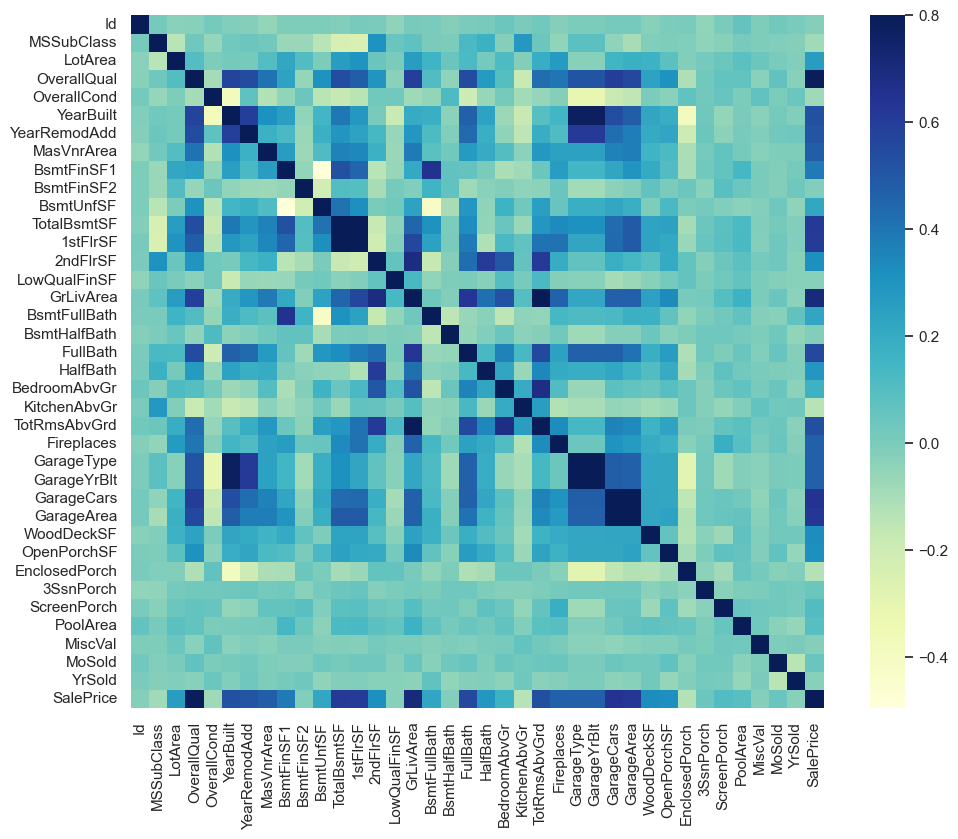

In [414]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu");

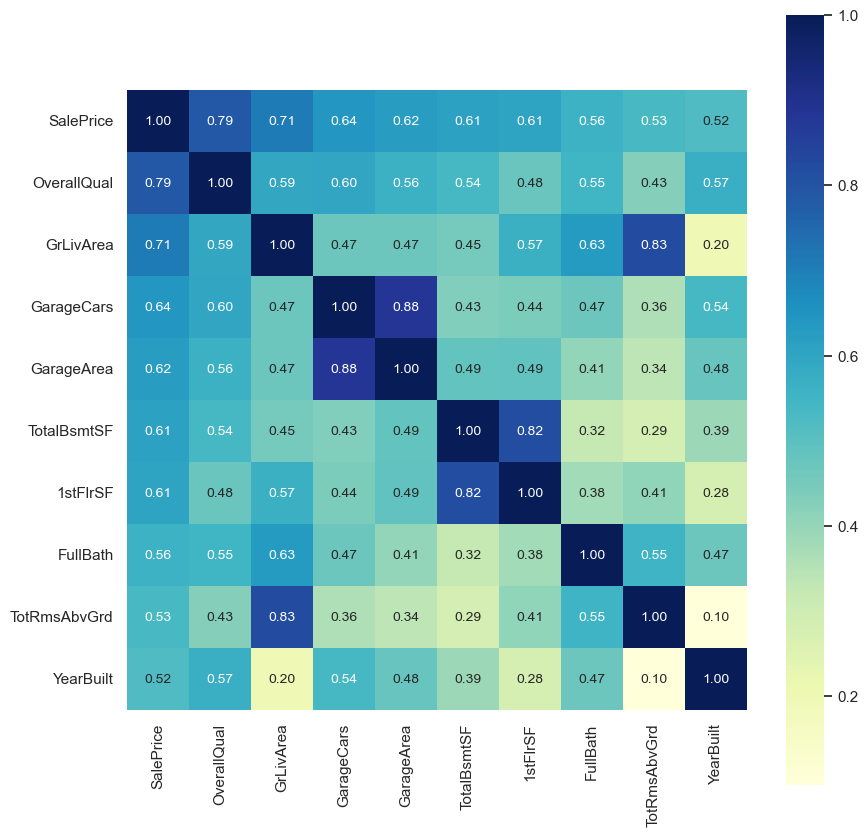

In [415]:
#saleprice correlation matrix
msns.plot_most_highly_correlated_heatmap(data,target="SalePrice")

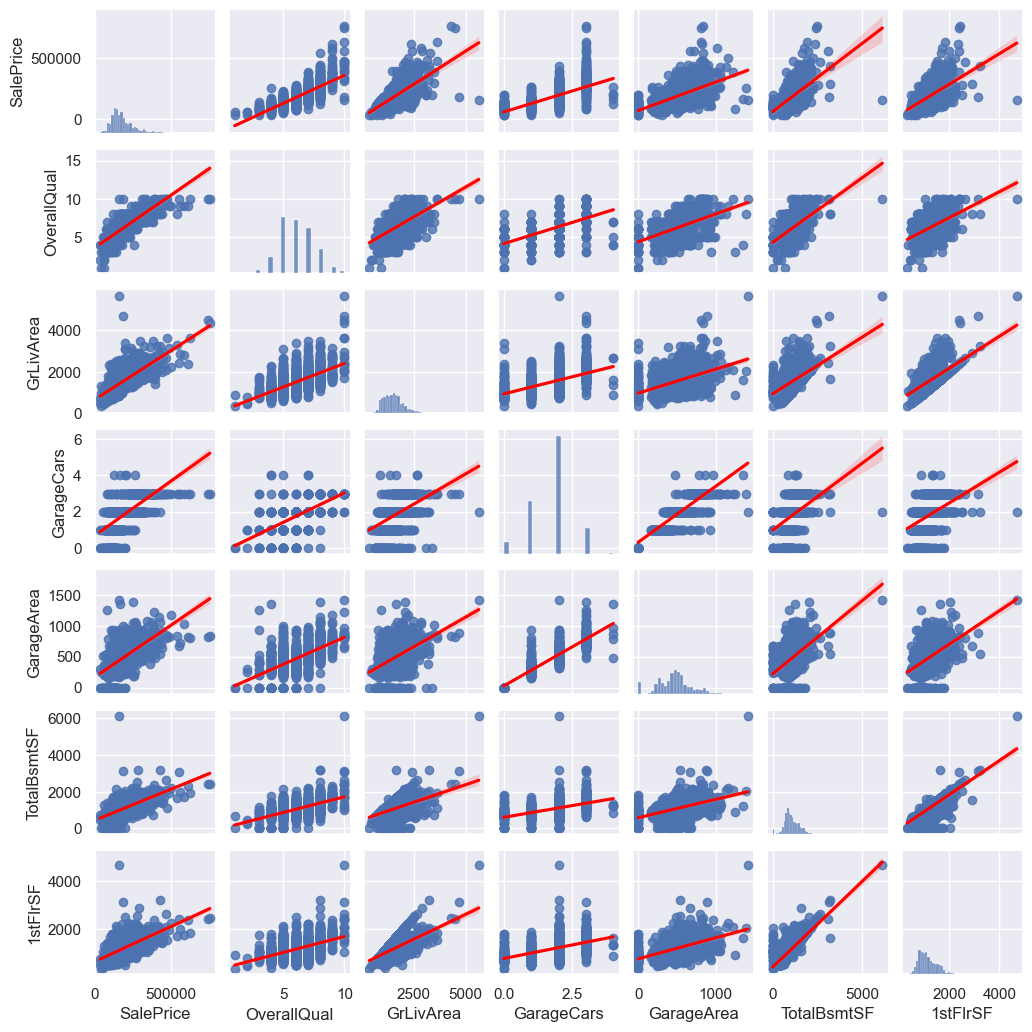

In [416]:
msns.plt_most_highly_correlated_pairplot(data, target="SalePrice",size=1.5, nlargest=7)

In [417]:
# #Auto EDA
# !pip install sweetviz
# import sweetviz as sv
# sweet_report = sv.analyze(data,pairwise_analysis="off")
# sweet_report.show_html('sweet_report.html')

<Axes: xlabel='SalePrice', ylabel='Density'>

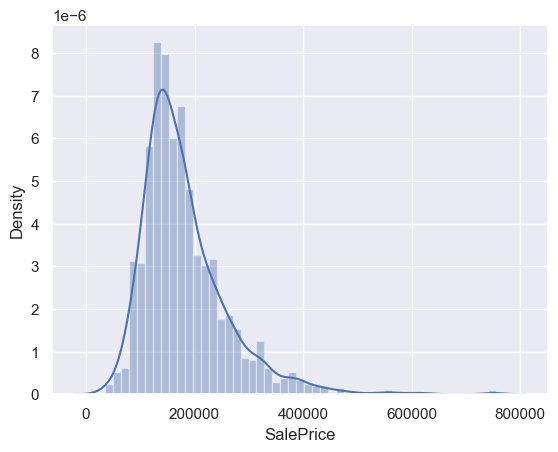

In [418]:
sns.distplot(data["SalePrice"])

In [419]:
# calculate skewness and kurtosis
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


data looks left skewed

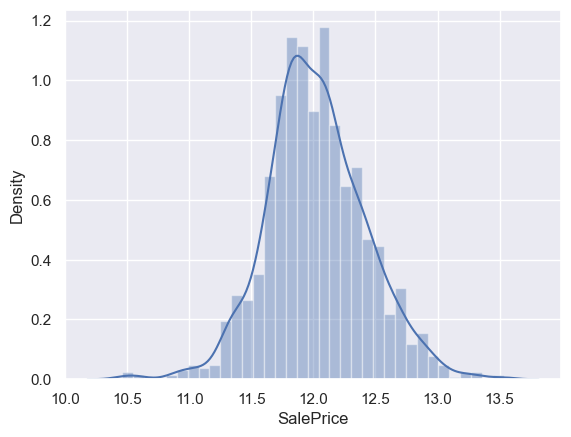

In [420]:
sns.distplot(np.log(data["SalePrice"]))
plt.show()

This looks way better, ML models work better with normally distributed data

In [421]:
# calculate skewness and kurtosis
print("Skewness: %f" % np.log(data["SalePrice"]).skew())
print("Kurtosis: %f" % np.log(data["SalePrice"]).kurt())

Skewness: 0.121335
Kurtosis: 0.809532


In [422]:
# calculate skewness and kurtosis
print("Skewness: %f" % data['1stFlrSF'].skew())
print("Kurtosis: %f" % data['1stFlrSF'].kurt())


Skewness: 1.376757
Kurtosis: 5.745841


In [423]:
data = pdx.filter_outliers(data, ['SalePrice','GrLivArea', 'TotalBsmtSF', '1stFlrSF' ])

In [424]:
data['TransformedPrice'] = np.log(data["SalePrice"])
data['LogGrLivArea'] = np.log(data["GrLivArea"])
data['LogTotalBsmtSF'] = np.log(data["TotalBsmtSF"])
data['Log1stFlrSF'] = np.log(data["1stFlrSF"])

In [425]:
categorical_cols = data.select_dtypes(include=['object']).columns
dummy_cols = pd.get_dummies(data[categorical_cols], drop_first=True)
dummy_cols.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0

In [426]:
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [427]:
data.drop(categorical_cols, axis=1, inplace=True)

In [428]:
data = pd.concat([data, dummy_cols], axis=1)

In [429]:
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TransformedPrice,LogGrLivArea,LogTotalBsmtSF,Log1stFlrSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694,7.444249,6.752270,6.752270,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0

### Building the Model

In [430]:
# split into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics  import r2_score

In [431]:
# X = data.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)
# y = data["TransformedPrice"]

In [432]:

data_train, data_test = train_test_split(data,train_size=0.7,test_size = 0.3, random_state=100)

In [433]:
print(data_train.shape)
print(data_test.shape)

(925, 239)
(397, 239)


In [434]:
scaler = RobustScaler()
data_train[data_train.columns] = scaler.fit_transform(data_train)
data_test[data_test.columns] = scaler.transform(data_test)

In [435]:
data_train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TransformedPrice,LogGrLivArea,LogTotalBsmtSF,Log1stFlrSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.000000,925.00

In [436]:
data_test.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TransformedPrice,LogGrLivArea,LogTotalBsmtSF,Log1stFlrSF,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.00

In [437]:
y_train = data_train["TransformedPrice"]
X_train = data_train.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)

y_test = data_test["TransformedPrice"]
X_test = data_test.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)

In [438]:
data_test.shape

(397, 239)

### Simple Linear Regression

In [439]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [440]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [441]:
print('R2 score for train data is {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print('R2 score for test data is {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))

R2 score for train data is 0.9469357512345232
R2 score for test data is -4544112.090629257


As you can see the R2 score for Train data is around 95%(very good fit) but the R2 score on the trainig set is very far from it 86% which shows that the model is overfit.

## Lasso Regression

In [442]:
#If alpha=0 then overfitting [Unregularised Model]
#Higher the alpha more the regularization more the underfitting
#Lower the alpha lesser the regularization more the overfitting
lr_lasso = Lasso(alpha=0.9)
lr_lasso.fit(X_train,y_train)

Lasso(alpha=0.9)

In [443]:
y_train_pred = lr_lasso.predict(X_train)
y_test_pred = lr_lasso.predict(X_test)

In [444]:
print('R2 score for train data is {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print('R2 score for test data is {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))

R2 score for train data is 0.05414111741554628
R2 score for test data is 0.037858677299545285


In [445]:
# lr_lasso.coef_

In [446]:
#Generate a list of 50 values between 0 and 0.9
params = {'alpha': np.linspace(0.000001,0.02 , num = 100) }

In [447]:
# # list of alphas to tune
# params = {'alpha': [0.00000001,0.0000001,0.000001,0.00001,0.0001, 0.001, 0.01, 0.05, 0.1,
#  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
#  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# UNCOMMENT AND CHECK THE BELOW PLOT

In [448]:
lasso  = Lasso()
folds = 5

model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params, 
                        scoring= 'r2',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-06, 2.03010101e-04, 4.05020202e-04, 6.07030303e-04,
       8.09040404e-04, 1.01105051e-03, 1.21306061e-03, 1.41507071e-03,
       1.61708081e-03, 1.81909091e-03, 2.02110101e-03, 2.22311111e-03,
       2.42512121e-03, 2.62713131e-03, 2.82914141e-03, 3.03115152e-03,
       3.23316162e-03, 3.43517172e-03, 3.63718182e-03, 3....
       1.61618081e-02, 1.63638182e-02, 1.65658283e-02, 1.67678384e-02,
       1.69698485e-02, 1.71718586e-02, 1.73738687e-02, 1.75758788e-02,
       1.77778889e-02, 1.79798990e-02, 1.81819091e-02, 1.83839192e-02,
       1.85859293e-02, 1.87879394e-02, 1.89899495e-02, 1.91919596e-02,
       1.93939697e-02, 1.95959798e-02, 1.97979899e-02, 2.00000000e-02])},
             return_train_score=True, scoring='r2', verbose=1)

In [449]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.181172,0.009517,0.002079,0.001537,0.000001,{'alpha': 1e-06},0.884742,0.869725,0.877082,0.800277,0.905778,0.867521,0.035716,100,0.951499,0.952698,0.951522,0.955978,0.946943,0.951728,0.002898
1,0.176394,0.012710,0.001262,0.000136,0.000203,{'alpha': 0.000203010101010101},0.896802,0.888568,0.892784,0.854347,0.920442,0.890589,0.021224,13,0.947212,0.948922,0.946881,0.951875,0.942830,0.947544,0.002947
2,0.133323,0.016831,0.001597,0.000621,0.000405,{'alpha': 0.000405020202020202},0.893905,0.896540,0.892430,0.866388,0.920534,0.893959,0.017178,1,0.941773,0.942486,0.941866,0.946442,0.938008,0.942115,0.002680
3,0.085353,0.010258,0.001353,0.000284,0.000607,{'alpha': 0.000607030303030303},0.893599,0.896347,0.890771,0.867831,0.919445,0.893598,0.016417,2,0.937977,0.937246,0.936855,0.941790,0.933473,0.937468,0.002658
4,0.076401,0.015982,0.002329,0.001361,0.000809,{'alpha': 0.000809040404040404},0.894309,0.894254,0.891392,0.867758,0.918458,0.893234,0.016068,3,0.935188,0.933546,0.933163,0.937734,0.929514,0.933829,0.002692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.042050,0.020943,0.001240,0.000065,0.019192,{'alpha': 0.019191959595959596},0.878331,0.860921,0.846056,0.873872,0.887671,0.869370,0.014494,95,0.882217,0.883974,0.882952,0.885372,0.877591,0.882421,0.002637
96,0.031821,0.010564,0.003525,0.002052,0.019394,{'alpha': 0.019393969696969698},0.878199,0.860624,0.845771,0.873862,0.887360,0.869163,0.014526,96,0.881921,0.883726,0.882758,0.885155,0.877341,0.882180,0.002648
97,0.043771,0.012576,0.002602,0.002377,0.019596,{'alpha': 0.019595979797979796},0.878064,0.860323,0.845483,0.873863,0.887044,0.868956,0.014558,97,0.881622,0.883476,0.882561,0.884937,0.877089,0.881937,0.002659
98,0.042022,0.012435,0.001797,0.000977,0.019798,{'alpha': 0.0197979898989899},0.877926,0.860020,0.845193,0.873866,0.886722,0.868745,0.014591,98,0.881320,0.883223,0.882363,0.884718,0.876839,0.881693,0.002670


In [450]:
cv_results[['param_alpha', 'mean_test_score', 'mean_train_score']]

,param_alpha,mean_test_score,mean_train_score
0,0.000001,0.867521,0.951728
1,0.000203,0.890589,0.947544
2,0.000405,0.893959,0.942115
3,0.000607,0.893598,0.937468
4,0.000809,0.893234,0.933829
...,...,...,...
95,0.019192,0.869370,0.882421
96,0.019394,0.869163,0.882180
97,0.019596,0.868956,0.881937
98,0.019798,0.868745,0.881693


In [451]:
# # plotting mean test and train scoes with alpha
# plt.figure(figsize=(15,8))
# cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
# # plotting
# plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
# plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
# plt.xlabel('alpha')
# plt.ylabel('R2')


# plt.title("R2 and alpha")
# plt.legend(['train score', 'test score'], loc='upper left')
# plt.show()


import plotly.graph_objects as go
fig = go.Figure(layout=go.Layout(height=800, width=1200))
fig.add_trace(go.Scatter(x=cv_results['param_alpha'], y=cv_results['mean_train_score'],
                    mode='lines',
                    name='train score'))
fig.add_trace(go.Scatter(x=cv_results['param_alpha'], y=cv_results['mean_test_score'],
                    mode='lines',
                    name='test score'))
fig.update_layout(title='R2 and alpha',
                     xaxis_title='alpha',
                     yaxis_title='R2')  
fig.show()

In [452]:
alpha = 0.004

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.004)

In [453]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [454]:
print('R2 score for train data is {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print('R2 score for test data is {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))

R2 score for train data is 0.908227705563203
R2 score for test data is 0.8708328105611921


In [455]:
sorted((filter(lambda x: x[1] != 0, zip(X_train.columns, lasso.coef_.round(4)))), key=lambda x: x[1], reverse=True)

[('YearBuilt', 0.2889),
 ('OverallQual', 0.2874),
 ('LogGrLivArea', 0.2727),
 ('GrLivArea', 0.1475),
 ('OverallCond', 0.1177),
 ('BsmtFinSF1', 0.1138),
 ('Neighborhood_Crawfor', 0.1131),
 ('Exterior1st_BrkFace', 0.107),
 ('Functional_Typ', 0.1028),
 ('LogTotalBsmtSF', 0.0807),
 ('Foundation_PConc', 0.0768),
 ('SaleCondition_Normal', 0.074),
 ('SaleCondition_Partial', 0.0677),
 ('YearRemodAdd', 0.0637),
 ('Neighborhood_BrkSide', 0.0633),
 ('Condition1_Norm', 0.0568),
 ('Neighborhood_Somerst', 0.0539),
 ('FireplaceQu_Gd', 0.0529),
 ('GarageArea', 0.0515),
 ('MSZoning_RL', 0.0473),
 ('GarageCars', 0.044),
 ('BsmtFullBath', 0.043),
 ('BsmtExposure_Gd', 0.0419),
 ('CentralAir_Y', 0.0319),
 ('Fireplaces', 0.029),
 ('WoodDeckSF', 0.0274),
 ('LotArea', 0.0204),
 ('Log1stFlrSF', 0.0162),
 ('MSZoning_FV', 0.0129),
 ('BsmtFinType1_GLQ', 0.0014),
 ('PoolArea', 0.0008),
 ('ScreenPorch', 0.0006),
 ('EnclosedPorch', 0.0002),
 ('BsmtFinSF2', 0.0001),
 ('3SsnPorch', -0.0001),
 ('LowQualFinSF', -0.0004)

In [465]:
X_train_trimmed = X_train.drop(['YearBuilt', 'OverallQual', 'LogGrLivArea', 'GrLivArea', 'OverallCond'], axis=1)
X_test_trimmed = X_test.drop(['YearBuilt', 'OverallQual', 'LogGrLivArea', 'GrLivArea', 'OverallCond'], axis=1)
alpha = 0.004

lasso_trimmed = Lasso(alpha=alpha)
lasso_trimmed.fit(X_train_trimmed, y_train)

y_train_trimmed_pred = lasso_trimmed.predict(X_train_trimmed)
y_test_trimmed_pred = lasso_trimmed.predict(X_test_trimmed)

print('R2 score for train data is {}'.format(r2_score(y_true=y_train, y_pred=y_train_trimmed_pred)))
print('R2 score for test data is {}'.format(r2_score(y_true=y_test, y_pred=y_test_trimmed_pred)))

R2 score for train data is 0.8813526513599584
R2 score for test data is 0.8504066063412214


In [466]:
sorted((filter(lambda x: x[1] != 0, zip(X_train_trimmed.columns, lasso_trimmed.coef_.round(4)))), key=lambda x: x[1], reverse=True)

[('2ndFlrSF', 0.4201),
 ('Log1stFlrSF', 0.2789),
 ('YearRemodAdd', 0.2279),
 ('Functional_Typ', 0.2124),
 ('CentralAir_Y', 0.1958),
 ('TotalBsmtSF', 0.182),
 ('Neighborhood_Crawfor', 0.1737),
 ('Exterior1st_BrkFace', 0.1599),
 ('Neighborhood_Somerst', 0.1493),
 ('MSZoning_RL', 0.123),
 ('BsmtFinSF1', 0.1132),
 ('SaleCondition_Partial', 0.1031),
 ('GarageQual_TA', 0.0942),
 ('SaleCondition_Normal', 0.0837),
 ('BsmtExposure_Gd', 0.0764),
 ('Foundation_PConc', 0.0749),
 ('FireplaceQu_Gd', 0.0717),
 ('BsmtFinType1_GLQ', 0.0686),
 ('FullBath', 0.0668),
 ('GarageCars', 0.0632),
 ('HalfBath', 0.0614),
 ('Condition1_Norm', 0.0539),
 ('GarageArea', 0.0484),
 ('PavedDrive_Y', 0.0432),
 ('Fireplaces', 0.0381),
 ('Neighborhood_NridgHt', 0.0367),
 ('Electrical_SBrkr', 0.0294),
 ('BsmtCond_TA', 0.0263),
 ('LotConfig_CulDSac', 0.0259),
 ('WoodDeckSF', 0.0257),
 ('GarageCond_TA', 0.0204),
 ('BsmtFullBath', 0.0126),
 ('OpenPorchSF', 0.0125),
 ('LotArea', 0.012),
 ('MasVnrArea', 0.0072),
 ('MSZoning_FV'

## Ridge Regression

In [456]:
params = {'alpha' :np.linspace(0.00001,1 , num = 100)}

In [457]:
ridge = Ridge()
folds = 5

model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params, 
                        scoring= 'r2',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.01109091e-02, 2.02118182e-02, 3.03127273e-02,
       4.04136364e-02, 5.05145455e-02, 6.06154545e-02, 7.07163636e-02,
       8.08172727e-02, 9.09181818e-02, 1.01019091e-01, 1.11120000e-01,
       1.21220909e-01, 1.31321818e-01, 1.41422727e-01, 1.51523636e-01,
       1.61624545e-01, 1.71725455e-01, 1.81826364e-01, 1....
       8.08082727e-01, 8.18183636e-01, 8.28284545e-01, 8.38385455e-01,
       8.48486364e-01, 8.58587273e-01, 8.68688182e-01, 8.78789091e-01,
       8.88890000e-01, 8.98990909e-01, 9.09091818e-01, 9.19192727e-01,
       9.29293636e-01, 9.39394545e-01, 9.49495455e-01, 9.59596364e-01,
       9.69697273e-01, 9.79798182e-01, 9.89899091e-01, 1.00000000e+00])},
             return_train_score=True, scoring='r2', verbose=1)

In [458]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007513,0.004610,0.001343,0.000253,0.00001,{'alpha': 1e-05},0.883491,0.869481,0.874649,0.799219,0.905326,0.866433,0.035772,100,0.951500,0.952699,0.951523,0.955978,0.946943,0.951729,0.002898
1,0.004723,0.002360,0.001911,0.001180,0.010111,{'alpha': 0.01011090909090909},0.885089,0.870839,0.876180,0.802733,0.906567,0.868282,0.034968,99,0.951491,0.952690,0.951514,0.955970,0.946937,0.951720,0.002897
2,0.004478,0.001714,0.001100,0.000092,0.020212,{'alpha': 0.02021181818181818},0.886280,0.872064,0.877494,0.805856,0.907637,0.869866,0.034224,98,0.951468,0.952669,0.951493,0.955947,0.946919,0.951699,0.002896
3,0.004925,0.001868,0.002756,0.002681,0.030313,{'alpha': 0.030312727272727272},0.887226,0.873181,0.878634,0.808656,0.908575,0.871254,0.033540,97,0.951437,0.952638,0.951461,0.955913,0.946893,0.951668,0.002893
4,0.005625,0.003600,0.002304,0.001339,0.040414,{'alpha': 0.04041363636363637},0.888004,0.874209,0.879633,0.811183,0.909407,0.872487,0.032912,96,0.951399,0.952599,0.951421,0.955870,0.946859,0.951630,0.002891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003754,0.001708,0.001141,0.000163,0.959596,{'alpha': 0.9595963636363636},0.894092,0.895868,0.891603,0.855324,0.921594,0.891696,0.021166,5,0.947056,0.947143,0.946195,0.950459,0.941644,0.946499,0.002831
96,0.007265,0.003978,0.001213,0.000127,0.969697,{'alpha': 0.9696972727272727},0.894092,0.895918,0.891624,0.855435,0.921611,0.891736,0.021135,4,0.947021,0.947096,0.946153,0.950415,0.941600,0.946457,0.002831
97,0.004931,0.002961,0.003500,0.002583,0.979798,{'alpha': 0.9797981818181818},0.894092,0.895968,0.891644,0.855544,0.921628,0.891775,0.021104,3,0.946987,0.947049,0.946111,0.950371,0.941557,0.946415,0.002831
98,0.005310,0.003171,0.002965,0.002889,0.989899,{'alpha': 0.9898990909090909},0.894092,0.896016,0.891664,0.855652,0.921644,0.891814,0.021073,2,0.946952,0.947003,0.946070,0.950328,0.941514,0.946373,0.002831


In [459]:
import plotly.graph_objects as go
fig = go.Figure(layout=go.Layout(height=600, width=1200))
fig.add_trace(go.Scatter(x=cv_results['param_alpha'], y=cv_results['mean_train_score'],
                    mode='lines',
                    name='train score'))
fig.add_trace(go.Scatter(x=cv_results['param_alpha'], y=cv_results['mean_test_score'],
                    mode='lines',
                    name='test score'))
fig.update_layout(title='R2 and alpha',
                     xaxis_title='alpha',
                     yaxis_title='R2')  
fig.show()

In [460]:
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [461]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [462]:
print('Ridge R2 score with alpha {} for train data is {}'.format(alpha, r2_score(y_true=y_train, y_pred=y_train_pred)))
print('Ridge R2 score with alpha {}for test data is {}'.format(alpha, r2_score(y_true=y_test, y_pred=y_test_pred)))

Ridge R2 score with alpha 0.1 for train data is 0.9466830720074955
Ridge R2 score with alpha 0.1for test data is 0.8707317568857426


In [463]:
sorted(filter(lambda x: x[1] != 0, zip(X_train.columns, ridge.coef_.round(4))), key=lambda x: x[1], reverse=True)

[('MSZoning_FV', 0.8461),
 ('MSZoning_RL', 0.7825),
 ('MSZoning_RH', 0.7294),
 ('MSZoning_RM', 0.6467),
 ('RoofStyle_Shed', 0.5891),
 ('SaleCondition_Partial', 0.5705),
 ('SaleCondition_AdjLand', 0.5265),
 ('SaleType_Oth', 0.5057),
 ('BsmtCond_Po', 0.434),
 ('Exterior1st_ImStucc', 0.3414),
 ('Street_Pave', 0.3273),
 ('Exterior1st_BrkFace', 0.2966),
 ('SaleType_Con', 0.288),
 ('Neighborhood_Crawfor', 0.2839),
 ('LogGrLivArea', 0.2666),
 ('Exterior1st_MetalSd', 0.255),
 ('Functional_Typ', 0.2394),
 ('SaleCondition_Alloca', 0.2392),
 ('Condition1_RRNn', 0.2292),
 ('YearBuilt', 0.2278),
 ('Log1stFlrSF', 0.2278),
 ('SaleType_CWD', 0.2101),
 ('Condition2_RRNn', 0.2057),
 ('Exterior2nd_Other', 0.2017),
 ('Condition1_PosA', 0.1868),
 ('Neighborhood_SWISU', 0.185),
 ('SaleCondition_Family', 0.1825),
 ('Exterior2nd_AsphShn', 0.1793),
 ('Neighborhood_BrkSide', 0.178),
 ('Neighborhood_NoRidge', 0.1764),
 ('Functional_Min1', 0.1763),
 ('Condition1_PosN', 0.1722),
 ('OverallQual', 0.1717),
 ('SaleTy